In [1]:
import pandas as pd



excel_file_path = '/content/Obesity_Dataset.xlsx'
df = pd.read_excel(excel_file_path)


csv_file_path = 'obesity_file.csv'
df.to_csv(csv_file_path, index=False)


In [2]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [3]:
df.isnull().sum()

,0
Sex,0
Age,0
Height,0
Overweight_Obese_Family,0
Consumption_of_Fast_Food,0
Frequency_of_Consuming_Vegetables,0
Number_of_Main_Meals_Daily,0
Food_Intake_Between_Meals,0
Smoking,0
Liquid_Intake_Daily,0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

scaler = StandardScaler()
X_norm= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(X_train[0]))
pca.fit(X_train)
data_pca = pca.transform(X_train)
data_pca

array([[-3.27699635e-01, -1.45136711e+00, -1.45352851e+00, ...,
         8.50987032e-01,  1.11236897e-01,  4.30129843e-02],
       [-1.32356490e+00,  1.94464324e+00, -1.23680167e+00, ...,
        -1.03409260e+00,  2.03506398e-01,  3.53495776e-01],
       [-2.38893348e+00, -1.15567965e+00,  8.76381611e-01, ...,
        -2.27046516e-01, -3.29656090e-01,  2.11716817e-04],
       ...,
       [-2.29287045e+00, -8.62917205e-01,  2.82527133e-01, ...,
        -1.35072608e-01, -5.07393607e-02, -3.77822520e-01],
       [ 9.80726478e-02, -8.89391973e-01,  6.22785083e-01, ...,
        -2.11301483e-01,  2.35618188e-01, -5.55345622e-02],
       [ 3.63684239e-01, -1.23973346e+00, -1.12351983e-01, ...,
        -4.63375206e-01, -1.93576456e-01,  5.22882894e-01]])

In [6]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X_train[0]))], index=df.columns[:-1])
print("PCA Loadings:\n", loadings)


PCA Loadings:
                                         PC1       PC2       PC3       PC4  \
Sex                               -0.132879 -0.633702  0.219191 -0.008513   
Age                                0.434379 -0.090971 -0.357898 -0.106037   
Height                             0.122799  0.641381 -0.160042 -0.038460   
Overweight_Obese_Family           -0.277100 -0.119162 -0.354088  0.017601   
Consumption_of_Fast_Food          -0.341256  0.039537 -0.313822 -0.046166   
Frequency_of_Consuming_Vegetables -0.381702  0.021920 -0.056791 -0.017179   
Number_of_Main_Meals_Daily         0.326911 -0.206389  0.083551  0.232324   
Food_Intake_Between_Meals          0.044600 -0.029800 -0.083908  0.833341   
Smoking                           -0.161886 -0.252915 -0.378489 -0.268724   
Liquid_Intake_Daily               -0.010227 -0.087224 -0.293803  0.247687   
Calculation_of_Calorie_Intake     -0.240280  0.063162 -0.324386  0.192009   
Physical_Excercise                 0.315205 -0.047381 -0.0295

In [7]:
threshold = 0.3

important_features={}
for column in loadings.columns:
  important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

for pc,features in important_features.items():
   print(f"{pc}: {', '.join(map(str, features))}")

PC1: Age, Consumption_of_Fast_Food, Frequency_of_Consuming_Vegetables, Number_of_Main_Meals_Daily, Physical_Excercise, Type_of_Transportation_Used
PC2: Sex, Height
PC3: Age, Overweight_Obese_Family, Consumption_of_Fast_Food, Smoking, Calculation_of_Calorie_Intake, Type_of_Transportation_Used
PC4: Food_Intake_Between_Meals
PC5: Liquid_Intake_Daily, Schedule_Dedicated_to_Technology
PC6: Liquid_Intake_Daily, Calculation_of_Calorie_Intake, Schedule_Dedicated_to_Technology
PC7: Overweight_Obese_Family, Food_Intake_Between_Meals, Smoking, Calculation_of_Calorie_Intake
PC8: Frequency_of_Consuming_Vegetables, Number_of_Main_Meals_Daily, Physical_Excercise, Schedule_Dedicated_to_Technology
PC9: Smoking, Physical_Excercise, Schedule_Dedicated_to_Technology, Type_of_Transportation_Used
PC10: Overweight_Obese_Family, Calculation_of_Calorie_Intake
PC11: Consumption_of_Fast_Food, Frequency_of_Consuming_Vegetables
PC12: Consumption_of_Fast_Food, Frequency_of_Consuming_Vegetables, Number_of_Main_Meals

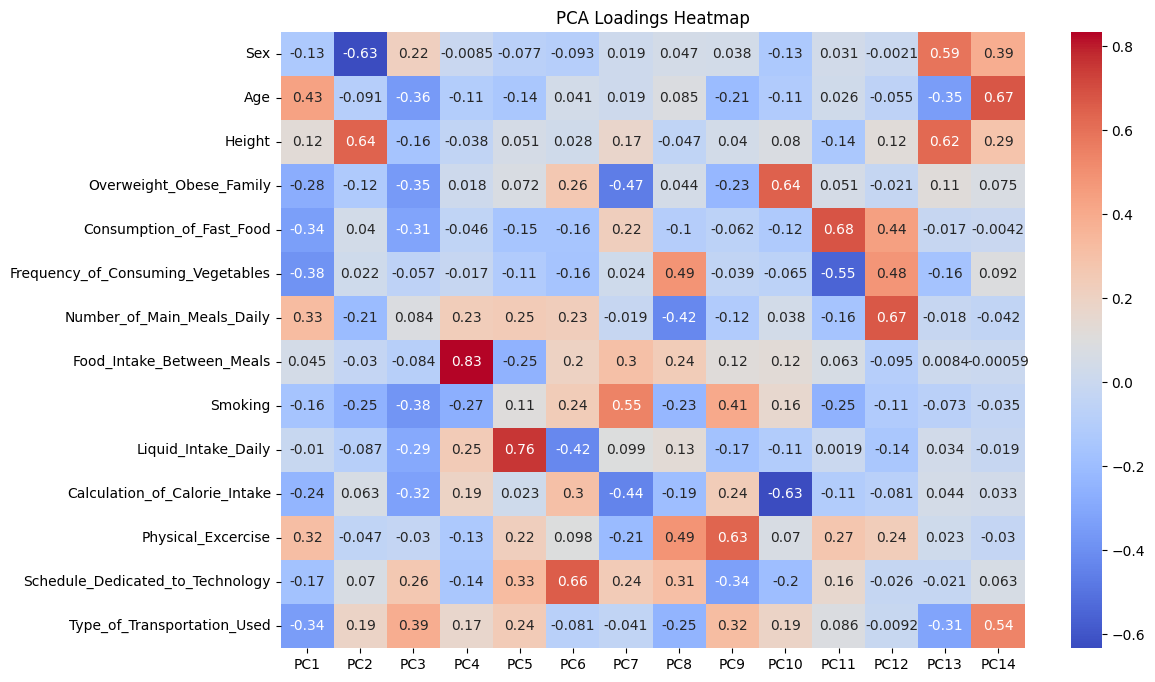

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

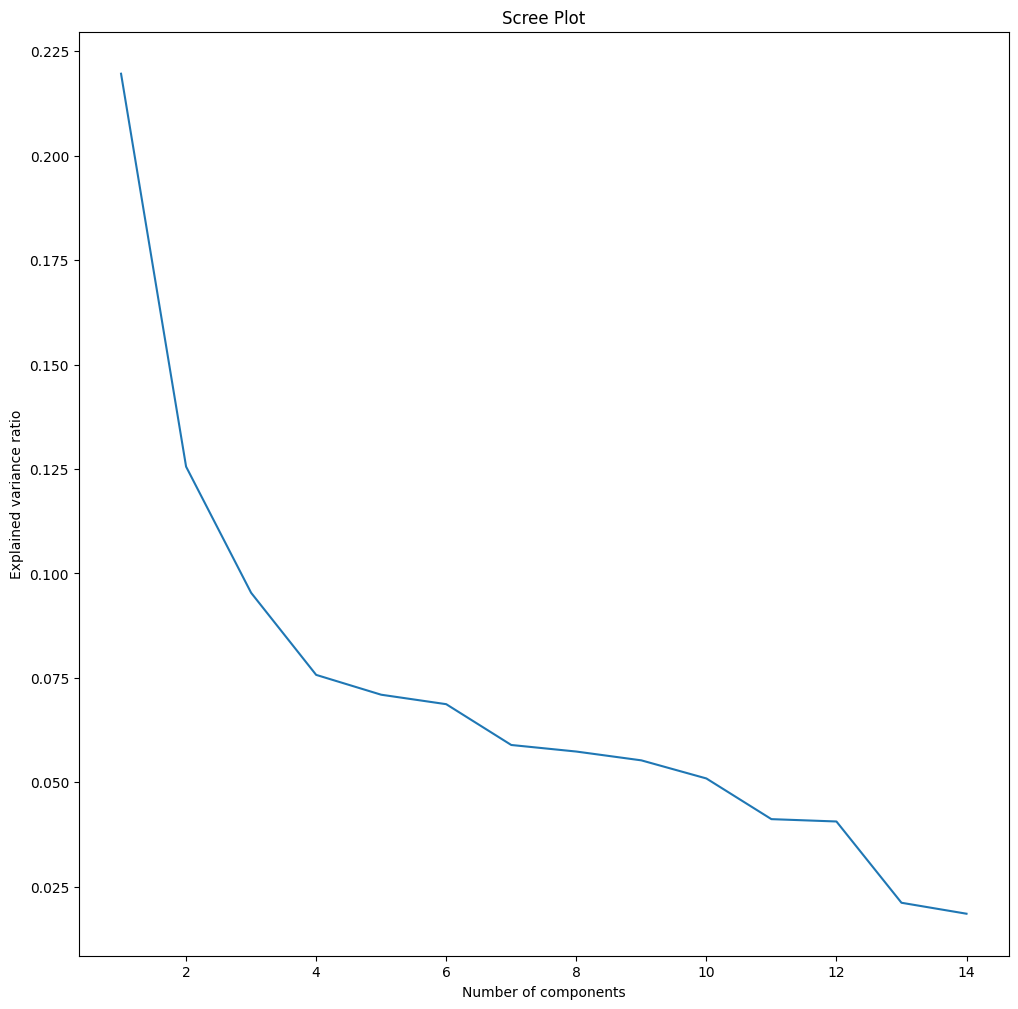

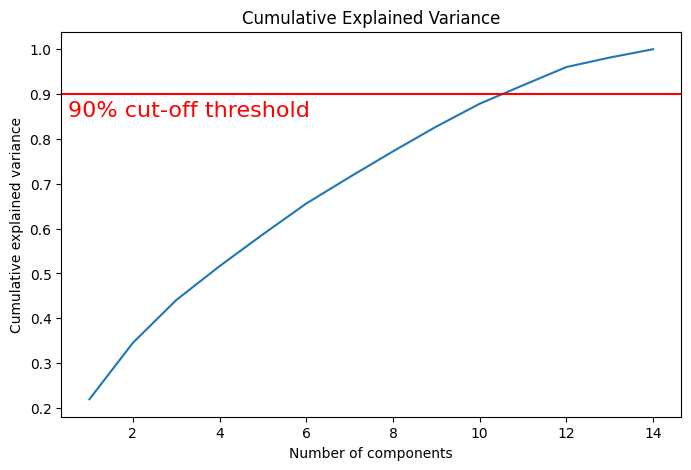

In [ ]:
import numpy as np
#scree plot
plt.figure(figsize=(12,12))
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1,len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-') #90% variance line
plt.text(0.5,0.85, '90% cut-off threshold', color= 'red', fontsize=16)
plt.show()

From the plot provided, it appears that this threshold is crossed somewhere
between the 10th and 11th components.
 • At least 11 principal components are important to capture 90% of the variance
in the data.
 • These would be PC1, PC2..PC11


In [ ]:
import plotly.express as px
fig = px.scatter(x=data_pca[:, 0], y=data_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

In [20]:
import numpy as np

from sklearn.manifold import TSNE

perplexity = np.arange(5, 250, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=600, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

0.2854183614253998

In [18]:
import plotly.express as px
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of Customer Churn dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

Using PCA to understand the variance structure of our data, especially for tasks that benefit from linear separation.
t-SNE doesn’t explain variance in a linear sense as PCA does; instead, it clusters data points based on similarity,
creating more visually interpretable clusters.

In [55]:
data = pd.read_csv('/content/fish_data (1).csv')
data.shape

(4080, 4)

In [56]:
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [60]:
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

In [61]:
X = data[['length', 'weight', 'w_l_ratio']].values
y = data['species'].values

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = to_categorical(y, num_classes=9)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model2 = Sequential()
model2.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # First hidden layer
model2.add(Dense(32, activation='relu'))  # Second hidden layer
model2.add(Dense(9, activation='softmax'))  # Output layer with 9 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [65]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [68]:
history = model2.fit(X_train, y_train, epochs=15, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9329 - loss: 0.1260 - val_accuracy: 0.9357 - val_loss: 0.1271
Epoch 2/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9362 - loss: 0.1165 - val_accuracy: 0.9433 - val_loss: 0.1263
Epoch 3/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9365 - loss: 0.1252 - val_accuracy: 0.9433 - val_loss: 0.1148
Epoch 4/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9334 - loss: 0.1200 - val_accuracy: 0.9372 - val_loss: 0.1159
Epoch 5/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9403 - loss: 0.1155 - val_accuracy: 0.9418 - val_loss: 0.1195
Epoch 6/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9395 - loss: 0.1104 - val_accuracy: 0.9464 - val_loss: 0.1103
Epoch 7/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.1069 - val_accuracy: 0.9479 - val_loss: 0.1132
Epoch 8/15
523/523 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9353 - loss: 0.1203 - val_accuracy: 0.

In [69]:
#Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9195 - loss: 0.1278
Test Accuracy: 0.93


In [71]:
#Make predictions
predictions = model2.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


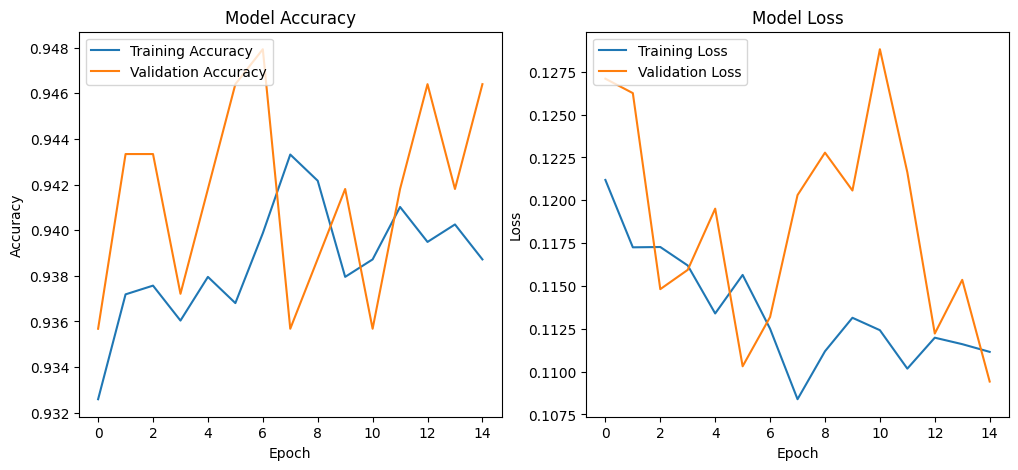

In [72]:

# Plot training & validation accuracy value
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

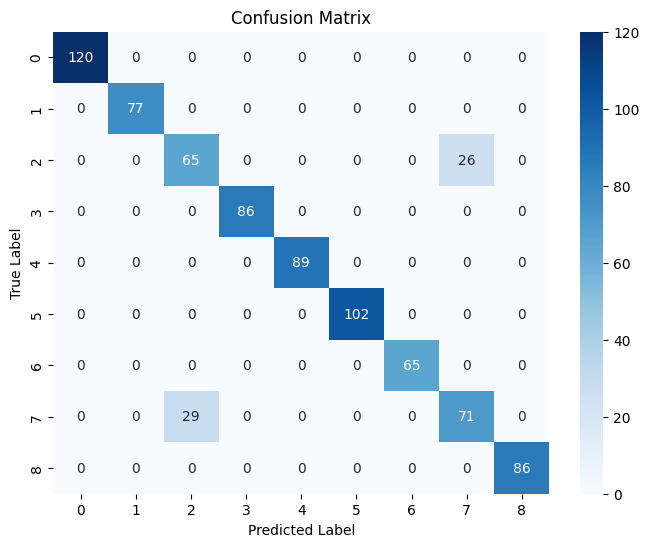

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Gradient descent and Loss function

The loss function measures how well a model's predictions match the actual data.

1. **Initialization:** Start with random values for the model's
weights.
2. **Compute Gradient:** Calculate the gradient  of the loss function with respect to each parameter. The gradient indicates the direction of steepest ascent in the loss function.
3. ** Update Parameters:** Adjust the parameters in the opposite direction of the gradient (to minimize the loss). The size of the step taken in this direction is determined by the learning rate, a hyperparameter that controls how quickly the model learns.
4. **Iterate:** Repeat the process: compute the gradient, update the parameters, and evaluate the loss until convergence (when the changes in the loss function are negligible).


# Backpropagation and Weight Updates in Neural Networks

1. **Forward Pass:** The input data is passed through the network, layer by layer, to compute the output. This output is compared to the actual target value using a loss function.
2. **Compute Loss:** Calculate the loss based on the output and the expected result.(cross-entropy)
3. ** Backward Pass:** Backpropagation starts at the output layer and works backward through the network:
Calculate the gradient of the loss with respect to the output of the last layer.
Use the chain rule to propagate these gradients backward through each layer, computing the gradient of the loss with respect to each weight.
4. **Weight Update:** Once the gradients are computed for all weights, they are updated using gradient descent. Each weight is adjusted in the opposite direction of its gradient, scaled by the learning rate.




Training model with relu activation:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Test Accuracy: 0.93

Training model with sigmoid activation:
Test Accuracy: 0.94

Training model with tanh activation:
Test Accuracy: 0.94


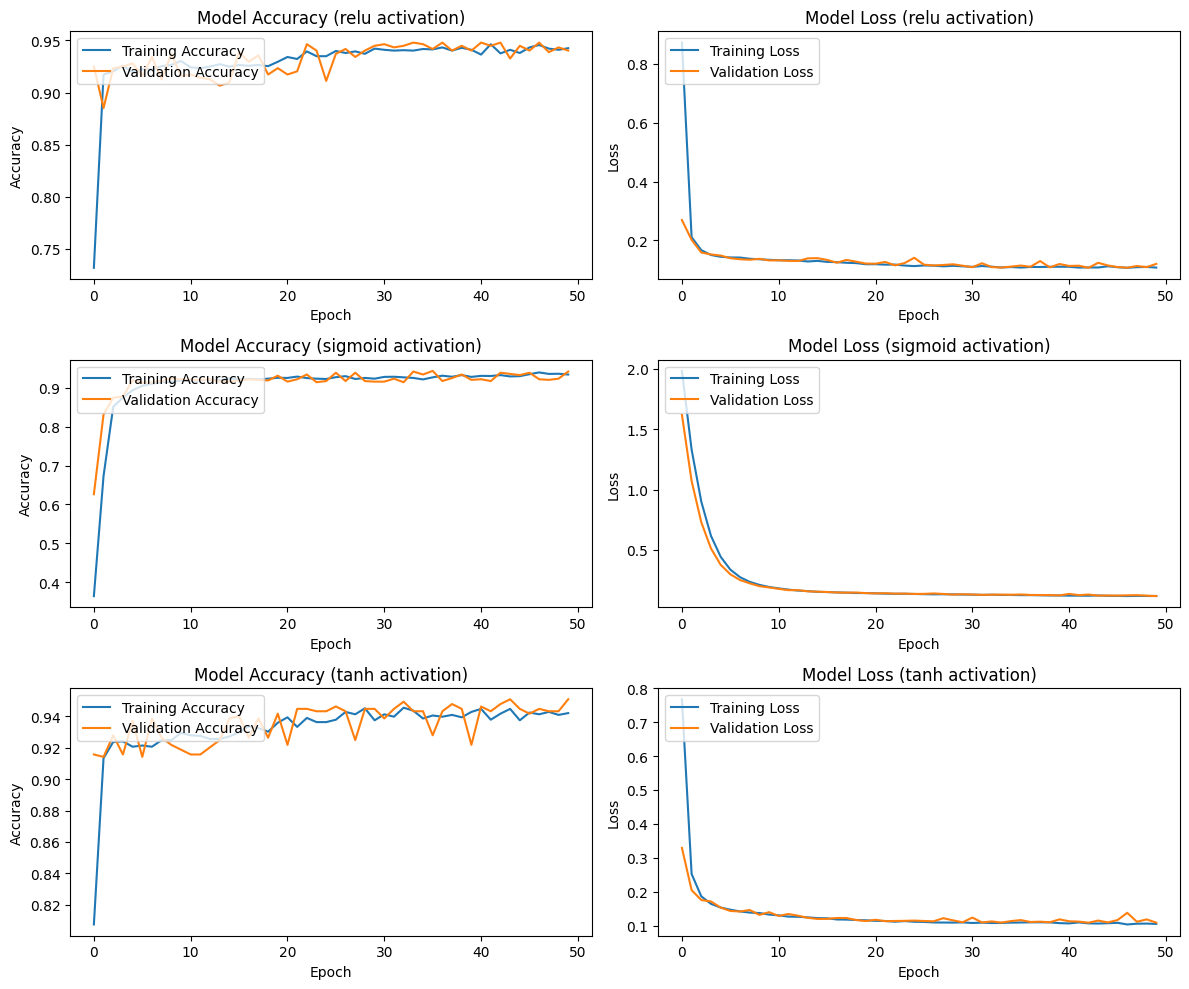

In [75]:
def create_model(activation_function):
    model2 = Sequential()
    model2.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation_function))  # First hidden layer
    model2.add(Dense(32, activation=activation_function))  # Second hidden layer
    model2.add(Dense(9, activation='softmax'))  # Output layer with 9 classes
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model2

# Train models with different activation functions
activations = ['relu', 'sigmoid', 'tanh']
history_dict = {}

for activation in activations:
    print(f"\nTraining model with {activation} activation:")
    model2 = create_model(activation)
    history = model2.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=0)
    history_dict[activation] = (history, test_accuracy)
    print(f"Test Accuracy: {test_accuracy:.2f}")


plt.figure(figsize=(12, 10))
for i, activation in enumerate(activations):
    history, test_accuracy = history_dict[activation]
    plt.subplot(len(activations), 2, i*2 + 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy ({activation} activation)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(len(activations), 2, i*2 + 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss ({activation} activation)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()